### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [84]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

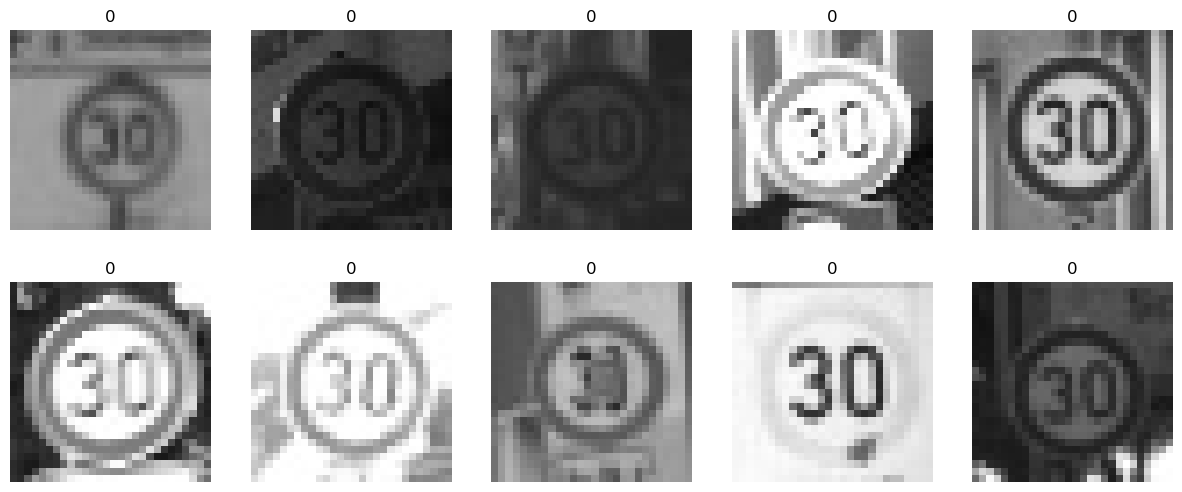

In [85]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

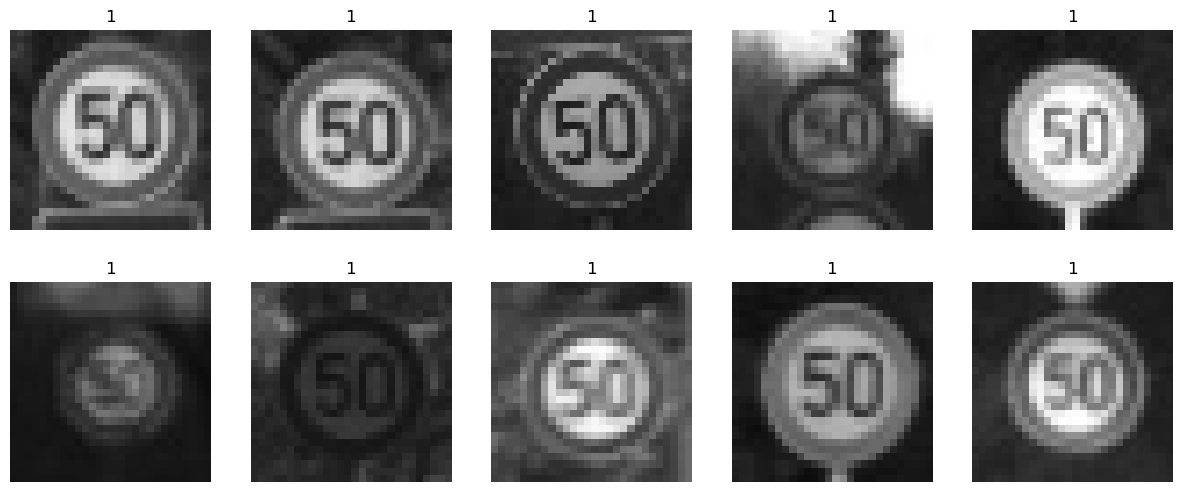

In [86]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [87]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [88]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [89]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.5165567398071289


Or, you know, just let make use of our friend numpy :-)

In [90]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.009527921676635742


Before the training, let's again have a look at some raqndom samples from our dataset.

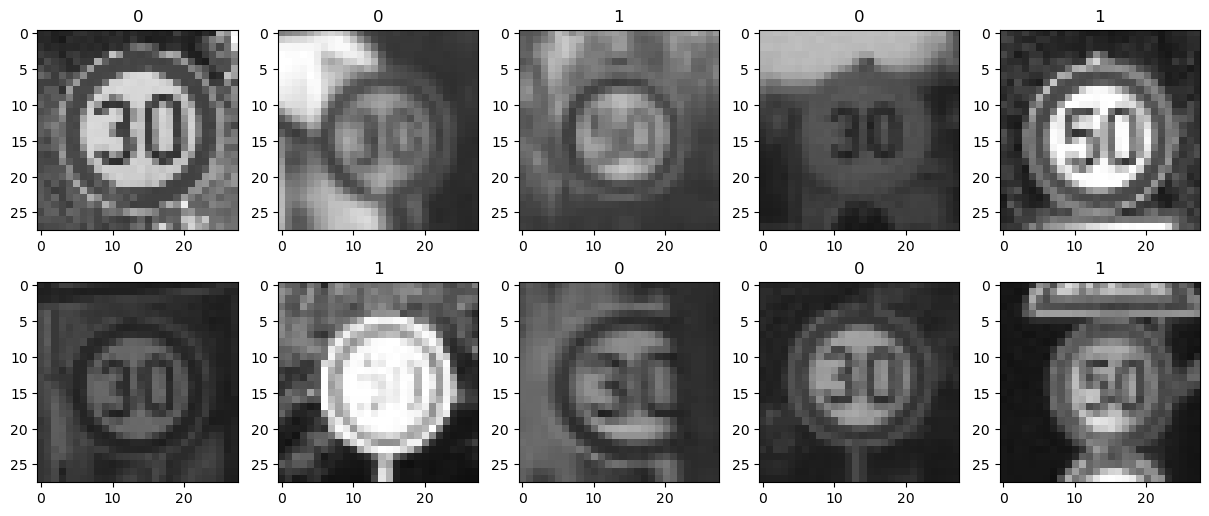

In [91]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [92]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [93]:
# Correct the shape here
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

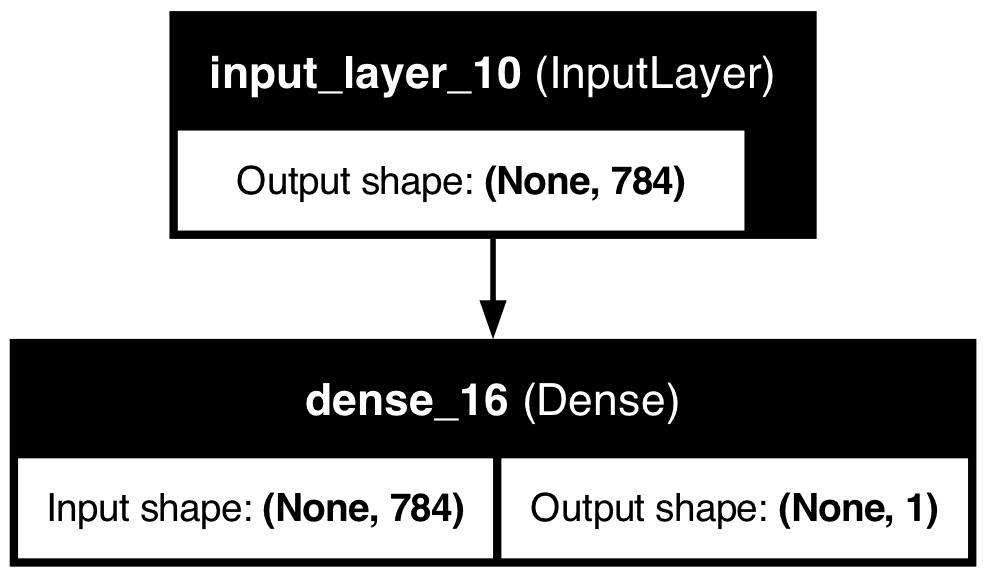

In [94]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [95]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [96]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3250
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.2114
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.1706
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.1512
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.1309
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1179
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.1169
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.1143
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0979
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.1036


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

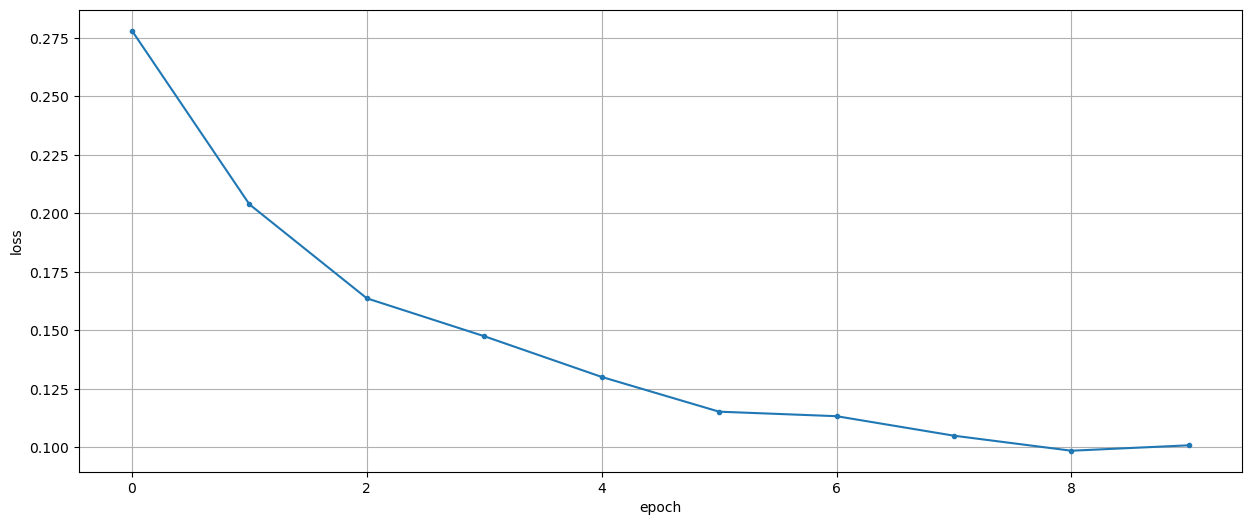

In [97]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.41984597] [0.41984597]


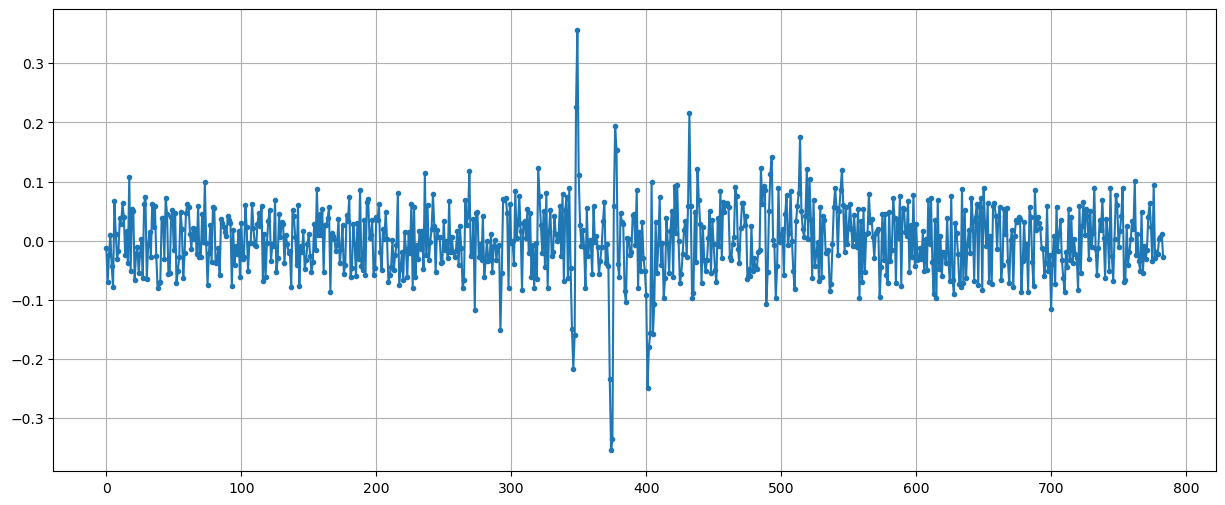

In [98]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [99]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.55929506]] 1


In [100]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


In [101]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9145413870246085


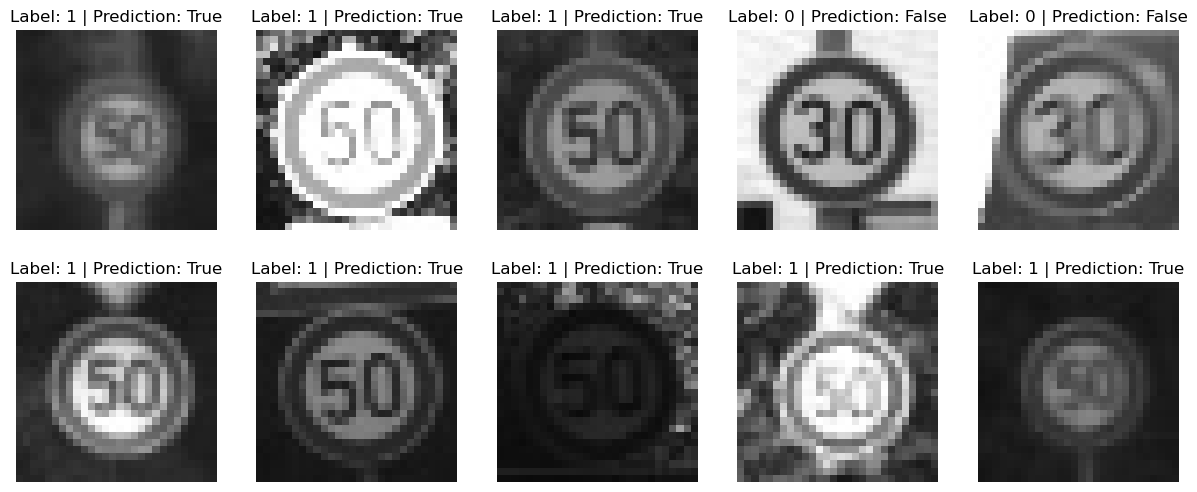

In [102]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

In [135]:
# More neuron layers
inputs = Input(shape=(pixels.shape[1],))
hiddenLayer = Dense(32, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(hiddenLayer)
model = Model(inputs, outputs)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

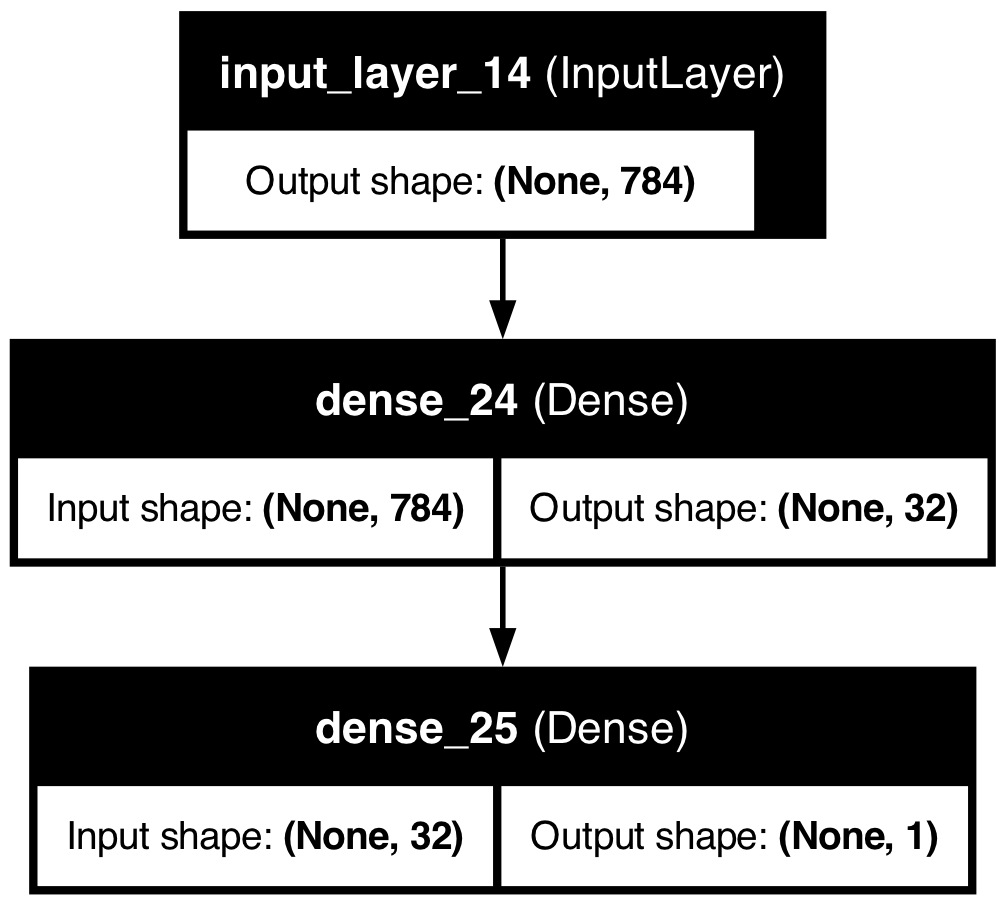

In [136]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [137]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [138]:
history1 = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.3871
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.2054
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.1445
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.1159
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.1016
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0918
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0917
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.0855
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0740
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.0740


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

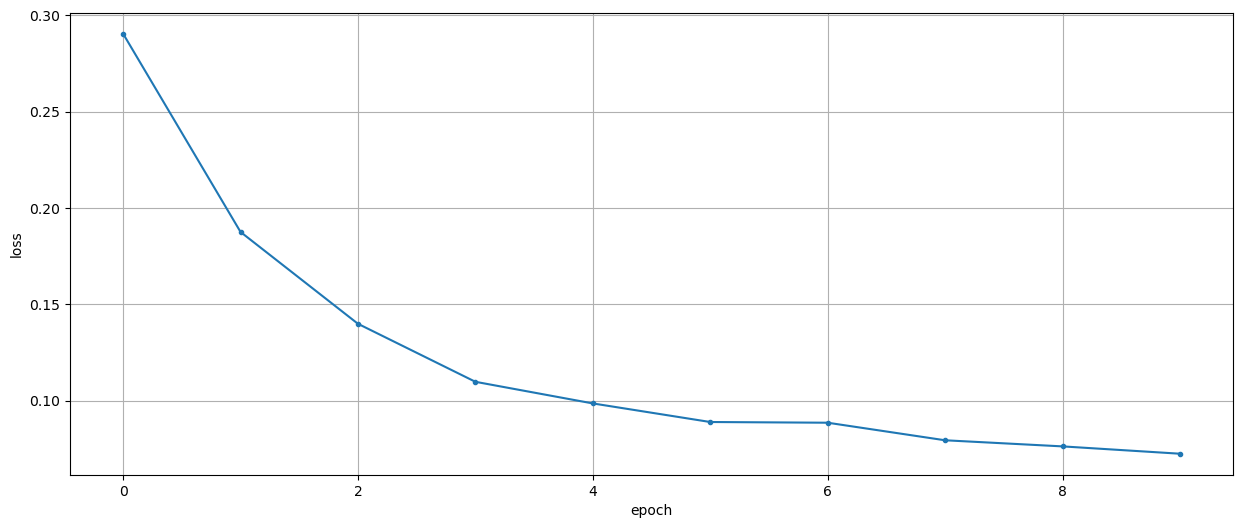

In [139]:
# Plot training history
h = history1.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[ 0.28069854 -0.00572359 -0.00555807  0.          0.3285508  -0.00664435
  0.22911887 -0.00600491 -0.16184781 -0.0044768  -0.00600508 -0.01049183
 -0.00661706 -0.00511919 -0.00600513 -0.0095269   0.03541115 -0.00570577
 -0.0064502  -0.00434233 -0.00627259 -0.00664553 -0.01784292  0.00832682
  0.18736961 -0.00625128 -0.00258529 -0.0060049   0.20019652  0.
 -0.00600168  0.22789969] [ 0.28069854 -0.00572359 -0.00555807  0.          0.3285508  -0.00664435
  0.22911887 -0.00600491 -0.16184781 -0.0044768  -0.00600508 -0.01049183
 -0.00661706 -0.00511919 -0.00600513 -0.0095269   0.03541115 -0.00570577
 -0.0064502  -0.00434233 -0.00627259 -0.00664553 -0.01784292  0.00832682
  0.18736961 -0.00625128 -0.00258529 -0.0060049   0.20019652  0.
 -0.00600168  0.22789969]


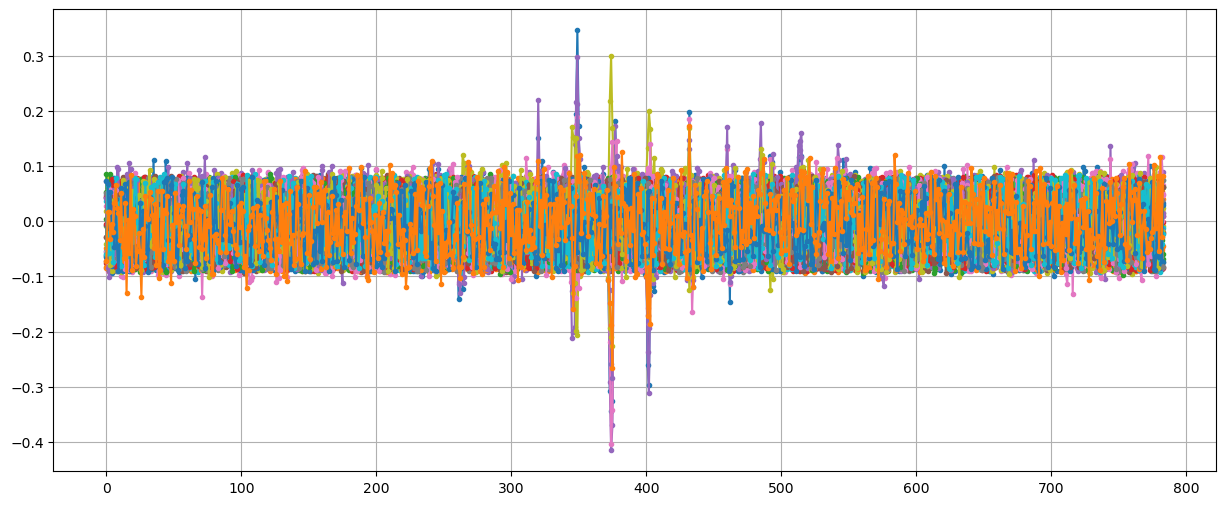

In [140]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [141]:
predictions1 = model.predict(pixels).squeeze()
predictions1 = predictions1 > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


In [142]:
correct = 0
for prediction, label in zip(predictions1, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy with one additional layer', correct/len(labels))

Accuracy with one additional layer 0.9579418344519016


In [143]:
# More neuron layers
inputs = Input(shape=(pixels.shape[1],))
hiddenLayer2 = Dense(32, activation="relu")(inputs)  # Another layer
hiddenLayer2 = Dense(132, activation="relu")(hiddenLayer2)  # Another layer
outputs = Dense(1, activation="linear")(hiddenLayer2)
model = Model(inputs, outputs)

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 132)            │         4,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,609 (115.66 KB)

 Trainable params: 29,609 (115.66 KB)

 Non-trainable params: 0 (0.00 B)

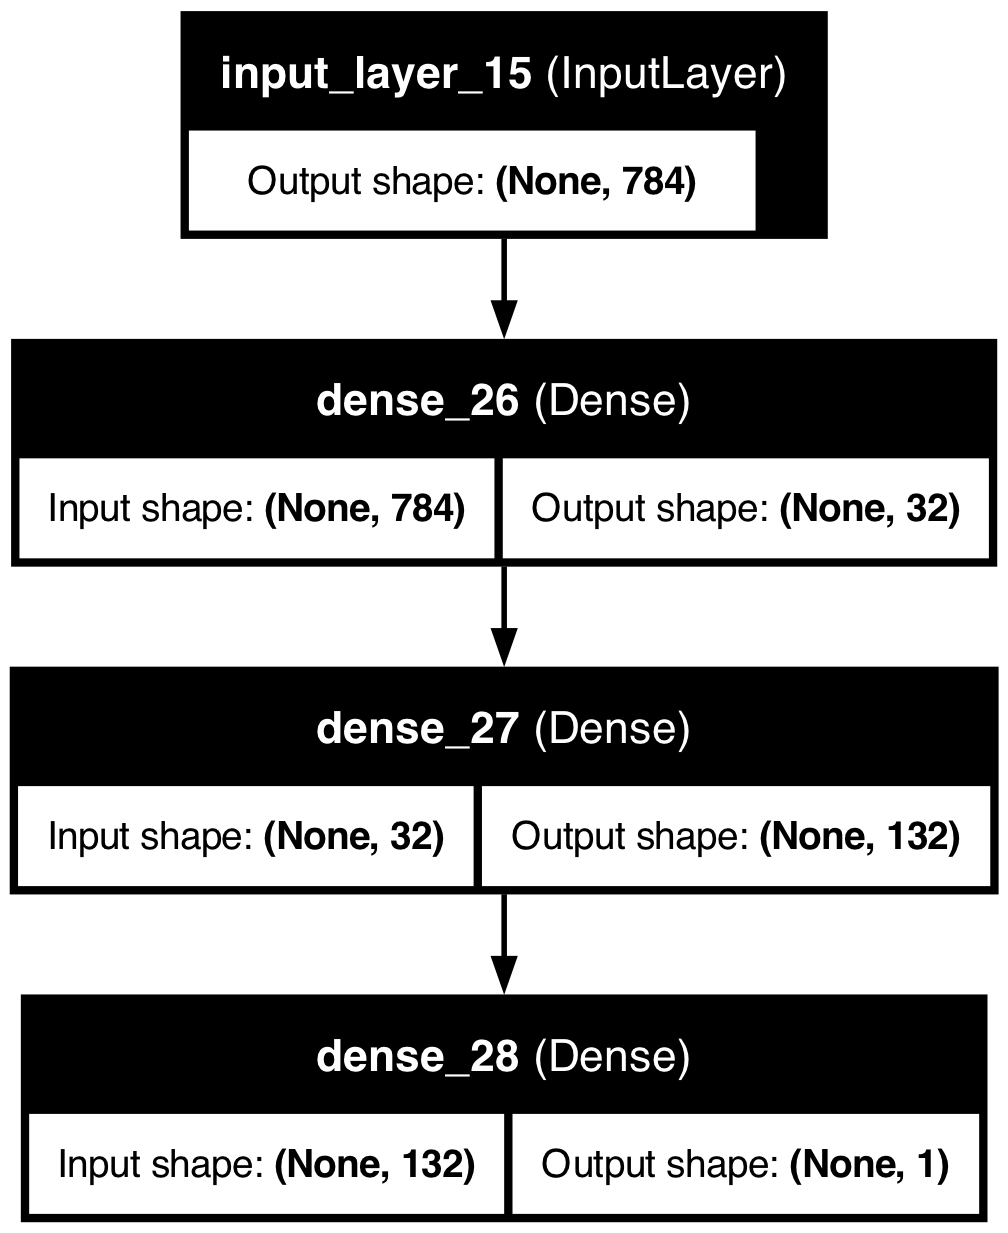

In [144]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [145]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [146]:
history2 = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2710
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.1477
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1060
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0822
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0705
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.0614
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0508
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0576
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0520


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

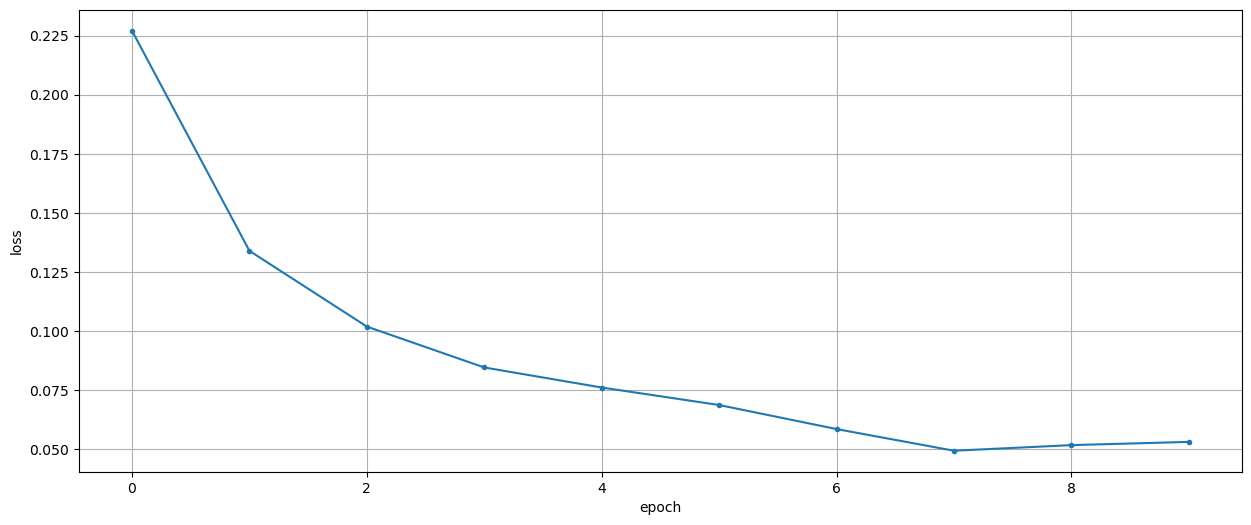

In [147]:
# Plot training history
h = history2.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.00638568 -0.00860767 -0.00086717 -0.00599065 -0.01591983  0.05909884
 -0.0395539  -0.00553107 -0.01042784 -0.00551665  0.0600271  -0.00600341
  0.01782931  0.03071858  0.04335687 -0.00674584 -0.01179677 -0.0060019
  0.004509    0.00674054  0.06961536 -0.00555446 -0.00606688 -0.00389291
 -0.02381926  0.03547386 -0.0084088  -0.00597436 -0.0043996  -0.00821097
 -0.00340064 -0.00775393] [-0.00638568 -0.00860767 -0.00086717 -0.00599065 -0.01591983  0.05909884
 -0.0395539  -0.00553107 -0.01042784 -0.00551665  0.0600271  -0.00600341
  0.01782931  0.03071858  0.04335687 -0.00674584 -0.01179677 -0.0060019
  0.004509    0.00674054  0.06961536 -0.00555446 -0.00606688 -0.00389291
 -0.02381926  0.03547386 -0.0084088  -0.00597436 -0.0043996  -0.00821097
 -0.00340064 -0.00775393]


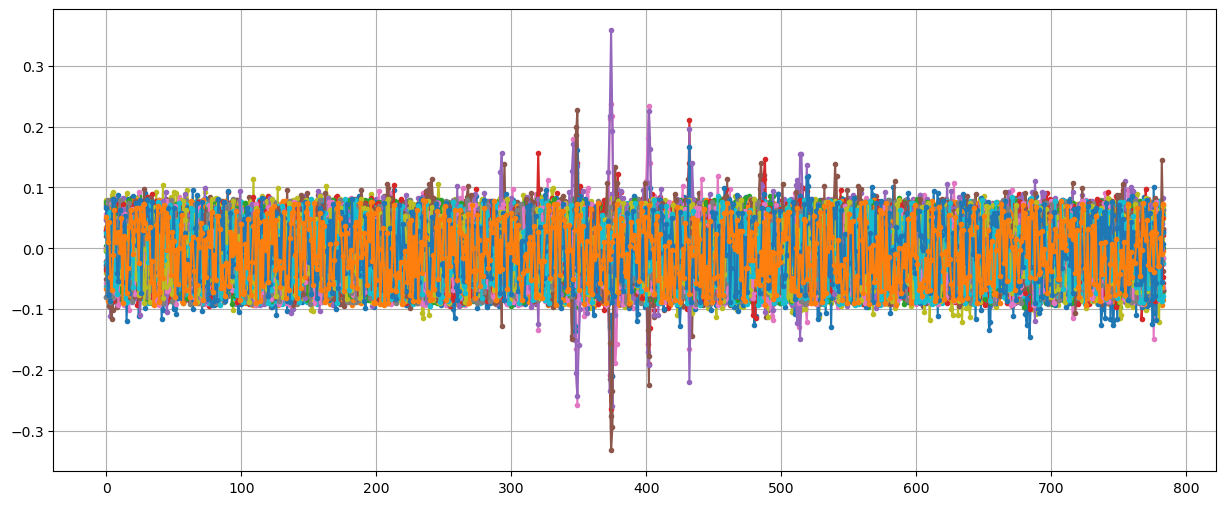

In [148]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [149]:
predictions2 = model.predict(pixels).squeeze()
predictions2 = predictions2 > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


In [150]:
correct = 0
for prediction, label in zip(predictions2, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy with two additional layers', correct/len(labels))

Accuracy with two additional layers 0.9445190156599552
